<a href="https://colab.research.google.com/github/rajathAgalkote/TedTalksViewsPrediction_MLRegression/blob/main/TED_Talks_Prediction_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **TED Talks Views Prediction**



##### **Project Type**    -Regression
##### **Contribution**    - Individual
##### **Member 1 -** Rajathadri A S

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **Objective -**


The main objective of this project is to build a predictive ML model, that can help predict the number of views of the videos uploaded on TEDx Website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

# Data Wrangling Libraries
import numpy as np
import pandas as pd

# Graphing/Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Miscellaneous libraries
import ast
import warnings
from google.colab import drive
from datetime import datetime
import datetime as dt 
import calendar

In [3]:
# Setting plot theme
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams["figure.autolayout"] = True

In [4]:
# Ignoring all warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [5]:
# upload Dataset

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
raw_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Project_Regression/data_ted_talks.csv")

### Dataset First View

In [44]:
# Dataset First Look

raw_data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,time_passed_since_published,publish_month,publish_year,publish_day,publish_week_day,daily_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",5056 days,Jun,2006,27,Tue,696.735614
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",5056 days,Jun,2006,27,Tue,2867.645837


### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count

raw_data.shape

(4005, 19)

In [ ]:
# The DataFrame has 19 features and 4005 entries.

### Dataset Information

In [10]:
# Dataset Info

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count

len(raw_data[raw_data.duplicated()])

0

In [ ]:
#There are no duplicate entries in the DataFrame

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count

print(raw_data.isnull().sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


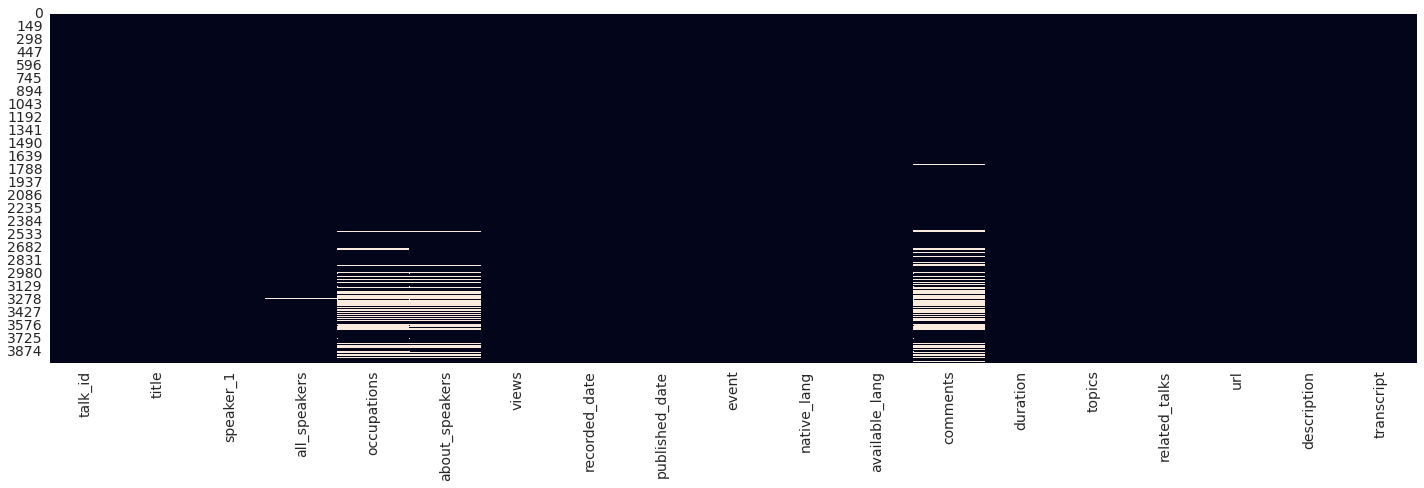

In [7]:
# Visualizing the missing values

plt.figure(figsize=(20,7))
sns.heatmap(raw_data.isnull(), cbar=False)

### What did you know about your dataset?

Pointers :    

1. There are 19 features/columns and 4005 entries.
2. There are NO duplicate entries.
3. There are NULL values in the following columns:
  * all_speakers : 4
  * occupations : 522
  * about_speakers : 503
  * recorded_date : 1
  * comments : 655

## ***2. Understanding Your Variables***

In [25]:
# Dataset Columns

raw_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [26]:
# Dataset Describe

raw_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description 

***talk_id*** : identification number provided by TED (int)

***title*** : Title of the talk (string)

***speaker_1*** : First speaker in TED's speaker list (string)

***speakers*** : Speakers in the talk (dictionary)

***occupations*** : Occupations of the speakers (dictionary)

***about_speakers*** : Blurb about each speaker (dictionary)

***views*** : Count of views / (int) -- **(Dependent Variable)**

***recorded_date*** : Date the talk was recorded (string)

***published_date*** : Date the talk was published to TED.com (string)

***event*** : Event or medium in which the talk was given (string)

***native_lang*** Language the talk was given in (string)

***available_lang*** : All available languages (lang_code) for a talk (list)

***comments*** : Count of comments (int)

***duration*** : Duration in seconds (int)

***topics*** : Related tags or topics for the talk (list)

***related_talks*** : Related talks (key='talk_id', value='title') (dictionary)

***url*** : URL of the talk (string)

***description*** : Description of the talk (string)

***transcript*** : Full transcript of the talk (string)

**The dictionary key maps to the speaker in ‘speakers’.**

### Check Unique Values for each variable.

In [27]:
# Check Unique Values for each variable.

for i in raw_data.columns.tolist():
  print("Unique values in ",i,": ",raw_data[i].nunique())

Unique values in  talk_id :  4005
Unique values in  title :  4005
Unique values in  speaker_1 :  3274
Unique values in  all_speakers :  3306
Unique values in  occupations :  2049
Unique values in  about_speakers :  2977
Unique values in  views :  3996
Unique values in  recorded_date :  1334
Unique values in  published_date :  2962
Unique values in  event :  459
Unique values in  native_lang :  12
Unique values in  available_lang :  3902
Unique values in  comments :  601
Unique values in  duration :  1188
Unique values in  topics :  3977
Unique values in  related_talks :  4005
Unique values in  url :  4005
Unique values in  description :  4005
Unique values in  transcript :  4005


In [ ]:
# There are 12 different native_lang entries

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [8]:
today=datetime.now()
today.strftime('%Y-%m-%d')

'2023-02-18'

In [9]:
# The format of recorded_date and published_date are in string format, we have to convert them into date format

# Recorded date formatting:
raw_data['recorded_date']= pd.to_datetime(raw_data['recorded_date'])
# Published date formatting:
raw_data['published_date']= pd.to_datetime(raw_data['published_date'])

In [10]:
raw_data[['recorded_date','published_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   recorded_date   4004 non-null   datetime64[ns]
 1   published_date  4005 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 62.7 KB


In [11]:
# Number of days Ted talk has been published
last_publishing_date= raw_data['published_date'].max()
raw_data['time_passed_since_published']= last_publishing_date - pd.DatetimeIndex(raw_data['published_date'])

In [12]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
raw_data['publish_month'] = pd.DatetimeIndex(raw_data['published_date']).month
raw_data['publish_month'] = raw_data['publish_month'].apply(lambda x: calendar.month_abbr[x])
raw_data['publish_year'] = pd.DatetimeIndex(raw_data['published_date']).year
raw_data['publish_day'] = pd.DatetimeIndex(raw_data['published_date']).day
raw_data['publish_week_day']= raw_data['published_date'].apply(lambda x: day_order[dt.date(x.year, x.month, x.day).weekday()])

In [13]:
# Creating variable for Daily Views(Target)

# Daily views/Talk:
raw_data['daily_views'] = raw_data['views'] / ( raw_data['time_passed_since_published'].apply(lambda x : x.days) + 1 )

In [14]:
raw_data[['publish_month','publish_year','publish_day','publish_week_day','daily_views']].head()

,publish_month,publish_year,publish_day,publish_week_day,daily_views
0,Jun,2006,27,Tue,696.735614
1,Jun,2006,27,Tue,2867.645837
2,Jun,2006,27,Tue,379.836267
3,Jun,2006,27,Tue,526.808187
4,Jun,2006,27,Tue,12863.744117


In [ ]:
# New features have been created for "published_date"

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Univariate Analysis

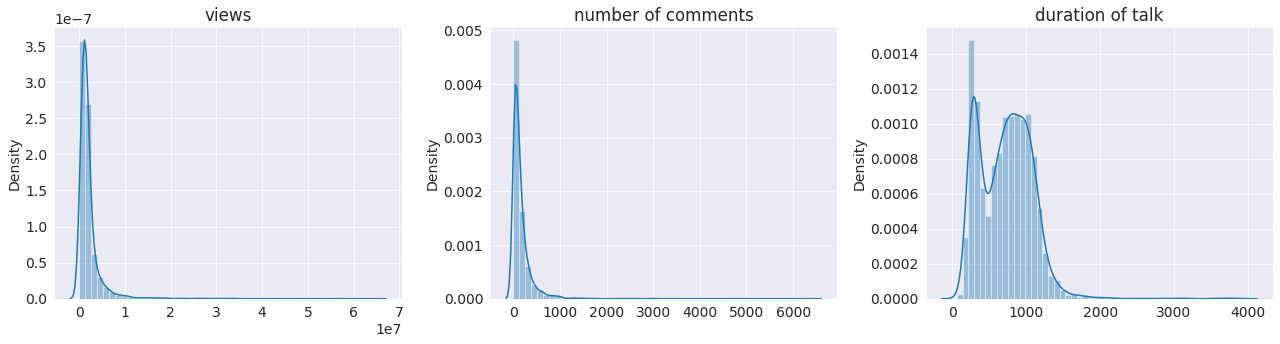

In [15]:
# Chart - 1 visualization code

# Univariate Analysis for continuous variables

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= raw_data['views'])

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= raw_data['comments'])

plt.subplot(1,3,3)
plt.title("duration of talk")
sns.distplot(x= raw_data['duration'])

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



---



#### Chart - 2

Bivariate analysis with dependent variable

In [ ]:
# Chart - 2 visualization code
# Multiple plots for Bivariate analysis

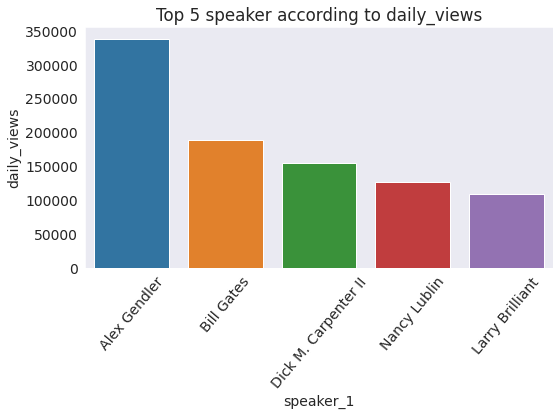

In [16]:
# speaker_1 vs daily_views
#top 5 speakers

temp=raw_data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

In [ ]:
# Speaker Vs Number of talks delivered

In [17]:
data_speaker_count=pd.DataFrame(raw_data['speaker_1'].value_counts()).reset_index().rename(columns=({'index':'Speaker','speaker_1':'Number of talks'}))

In [18]:
data_speaker_count.head()

,Speaker,Number of talks
0,Alex Gendler,34
1,Iseult Gillespie,19
2,Emma Bryce,12
3,Daniel Finkel,11
4,Alex Rosenthal,10


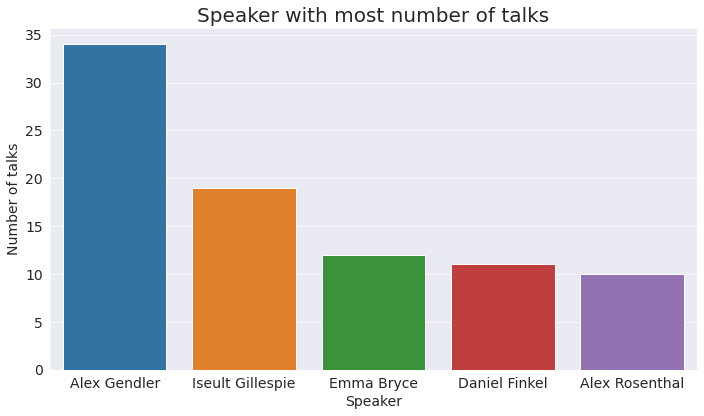

In [19]:
# plot for number of talks vs speaker

most_talks = data_speaker_count.nlargest(5, 'Number of talks')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker', y = 'Number of talks', data = most_talks)
plt.title('Speaker with most number of talks',fontsize=20)
plt.show()

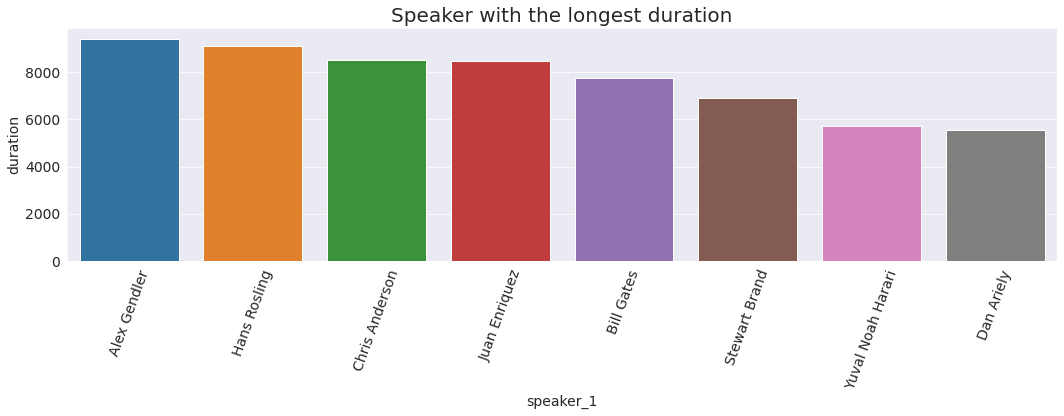

In [20]:
# Let us also calculate the duration of individual speakers

temp=raw_data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=raw_data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70)
plt.title('Speaker with the longest duration',fontsize=20);

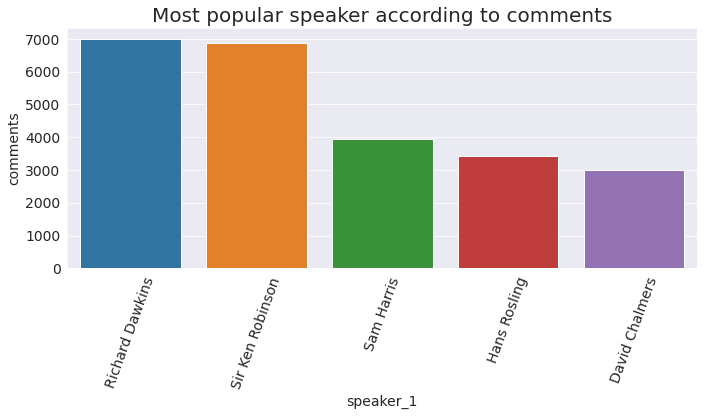

In [21]:
# Speaker vs total number of comments

temp=raw_data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=70);
plt.title('Most popular speaker according to comments',fontsize=20)
plt.show()     

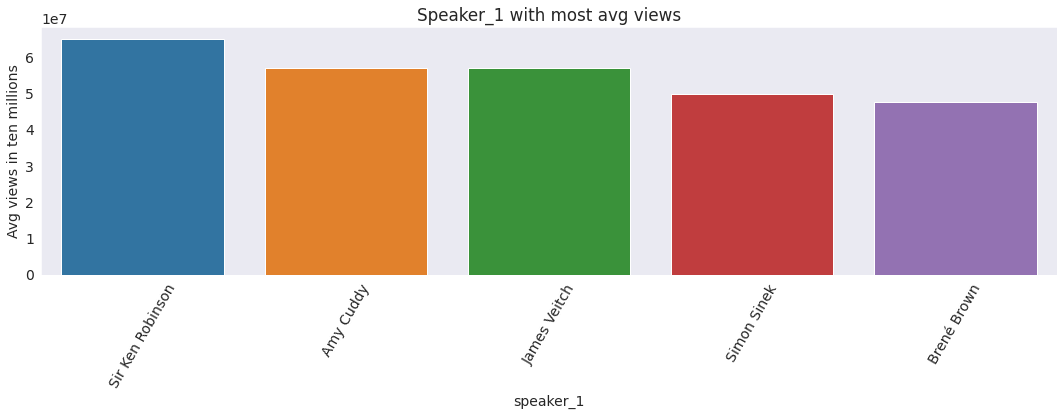

In [22]:
# Speaker most popular video
temp=raw_data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most avg views')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



---



#### Chart - 3

Target Encoding

Target encoding can be included as an integral part of Data Wrangling as well. But, we will include it here as it involves a lot of visualization aspect as well.

*Target encoding is the process of replacing a catgorical variable values with the mean of the target (dependent variable) variable*


The categorical features that needs to be encoded are:
  1. speaker_1
  2. event
  3. available_language
  4. num_of_topic
  5. unique_topics
  6. related_talks
  7. time_passed_since_public

In [ ]:
# Chart - 3 visualization code

1. Speaker_1 feature

In [23]:
# Applying Target encoding on speaker_1

speaker=raw_data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
raw_data['speaker_1_avg_views']=raw_data['speaker_1'].map(speaker)

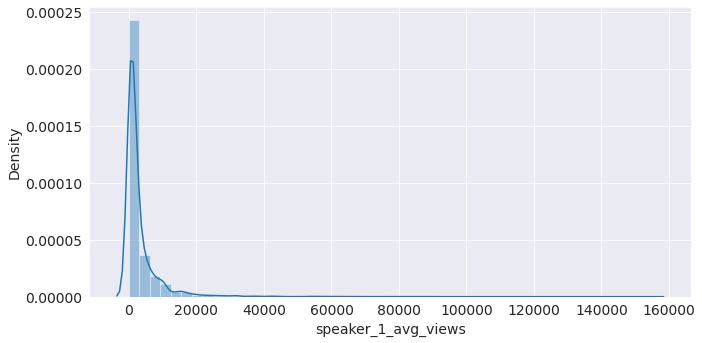

In [24]:
# plot for the same
plt.figure(figsize=(10,5))
sns.distplot(raw_data['speaker_1_avg_views'])
plt.show()

2. Event Feature

In [25]:
# Applying Target encoding on event

event=raw_data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
raw_data['event_wise_avg_views']=raw_data['event'].map(event)

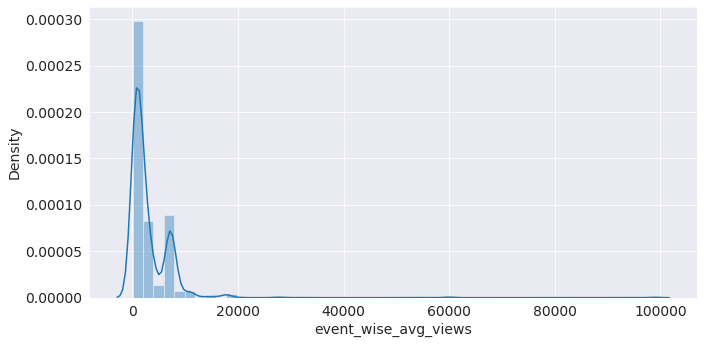

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['event_wise_avg_views'])
plt.show()

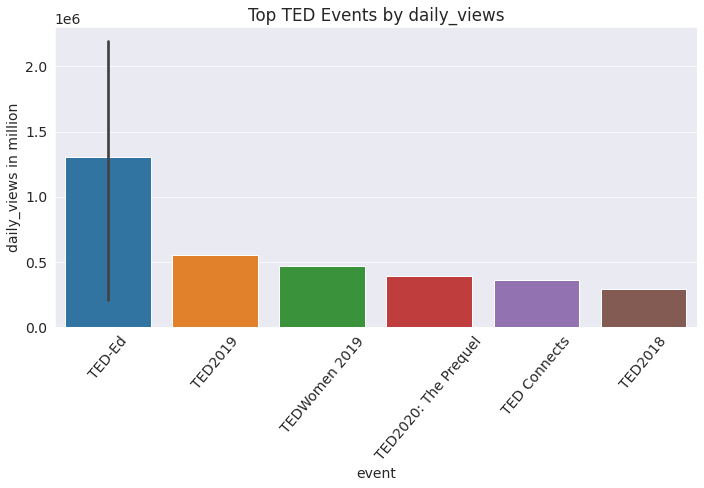

In [28]:
# Top 10 events are:

temp=raw_data.groupby(['event','publish_year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,7))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

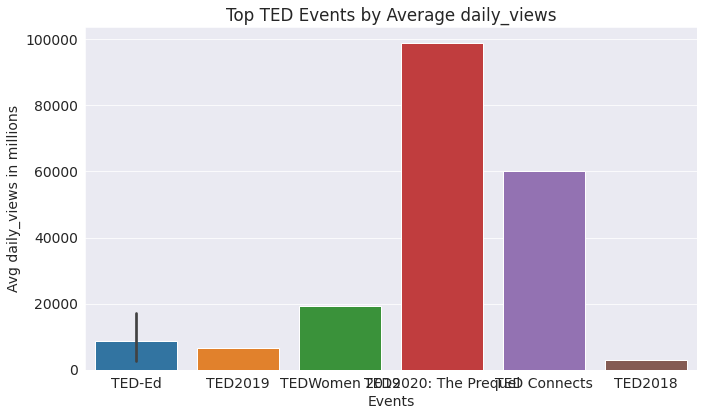

In [29]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by Average daily_views')
plt.xlabel('Events')
plt.ylabel('Avg daily_views in millions')
plt.show()

3. Available_Language feature

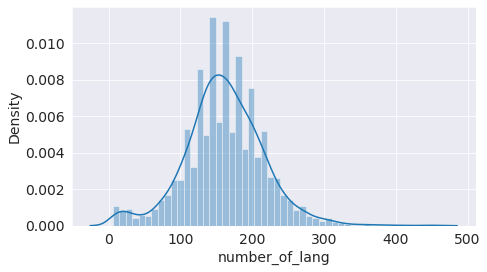

In [30]:
# Applying Target encoding on available_language

raw_data['number_of_lang'] = raw_data['available_lang'].apply(lambda x: len(x))
sns.distplot(raw_data['number_of_lang'])
plt.show()

4. num_of_topic from topic feature

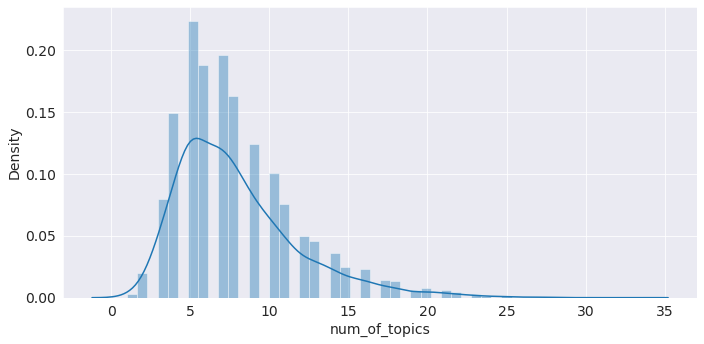

In [31]:
# Applying Target encoding on num_of_topic

raw_data['topics'] = raw_data.apply(lambda x: eval(x['topics']), axis=1)
raw_data['num_of_topics'] = raw_data.apply(lambda x: len(x['topics']), axis=1)
# graph:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['num_of_topics'])

In [32]:
#Checking for number of unique topic

unique_topics=[]
for i in range(0,len(raw_data)):
  temp=raw_data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

5. Unique_topics variable

In [33]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(raw_data)):
    temp2=raw_data['topics'][i]
    if(topic in temp2):
      temp+=raw_data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [34]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(raw_data)):
  temp=0
  temp_topic=raw_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
raw_data['topics_wise_avg_views'] = se.values

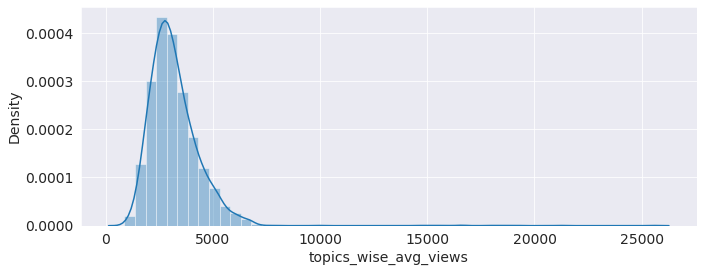

In [35]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(raw_data['topics_wise_avg_views'])

6. related_talks feature

In [36]:
raw_data['related_talks'] = raw_data['related_talks'].apply(lambda x: ast.literal_eval(x))

Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value. 

Taking mean of all realated talk videos views.

In [37]:
#defining a new feature called related_views
raw_data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in raw_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(raw_data)):
      if (raw_data.loc[i,'talk_id']) in id_list:
        temp+=raw_data.loc[i,'daily_views']

    raw_data.loc[index,'related_views']=temp//6

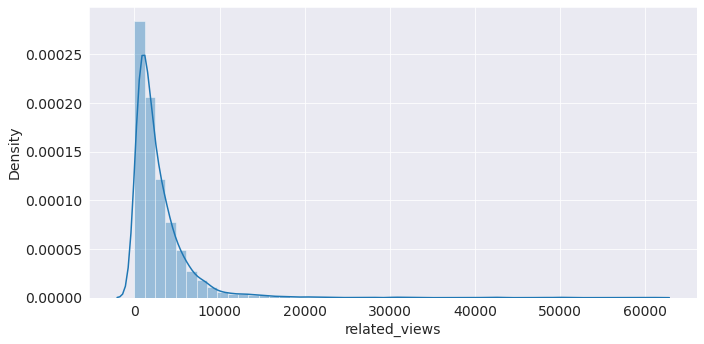

In [38]:
#Graph of related_views

plt.figure(figsize=(10,5))
sns.distplot(raw_data['related_views'])
plt.show()

In [39]:
# Converting time_passed_since_published into integer

raw_data['time_passed_since_published'] = raw_data['time_passed_since_published'].dt.days.astype('int16')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here



---



#### DataSet Glance

In [40]:
# Let us have a glance at the Dataset

raw_data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,publish_year,publish_day,publish_week_day,daily_views,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,topics_wise_avg_views,related_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,2006,27,Tue,696.735614,699.725014,782.72889,270,9,2432.0,3093
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,2006,27,Tue,2867.645837,1098.925286,782.72889,303,11,2546.0,865


In [41]:
raw_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'number_of_lang', 'num_of_topics',
       'topics_wise_avg_views', 'related_views'],
      dtype='object')

In [42]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   talk_id                      4005 non-null   int64         
 1   title                        4005 non-null   object        
 2   speaker_1                    4005 non-null   object        
 3   all_speakers                 4001 non-null   object        
 4   occupations                  3483 non-null   object        
 5   about_speakers               3502 non-null   object        
 6   views                        4005 non-null   int64         
 7   recorded_date                4004 non-null   datetime64[ns]
 8   published_date               4005 non-null   datetime64[ns]
 9   event                        4005 non-null   object        
 10  native_lang                  4005 non-null   object        
 11  available_lang               4005 non-null 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***